In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 큰 수의 법칙, 중심 극한 이론, 신뢰구간에 대하여

모집단의 모수를 바탕으로 한 번 이해해봅시다 !

평균 : 0.66828, 분산 : 0.2216818416, 표준편차 : 0.4708310117228898


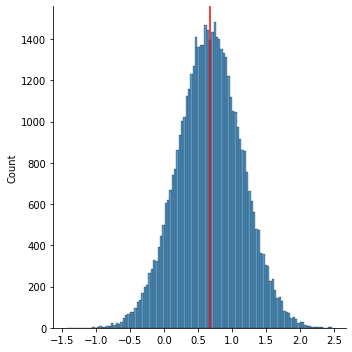

In [3]:
np.random.seed(42)

# 5만명의 사람 중 0은 전공자 1은 비전공자 즉 비전공자의 비율이 67프로 전공자의 비율이 33프로인 모집단을 만듦.
group_a = np.random.choice([0,1], size = 50000, p = [.33, .67])

print(f"평균 : {group_a.mean()}, 분산 : {group_a.var()}, 표준편차 : {group_a.std()}")
        # 데이터가 0과 1로 이루어졌기 때문에 평균은 비율과 같다 !
pop = np.random.normal(loc = group_a.mean(), scale = group_a.std(), size = 50000);
sns.displot(pop) # loc : 평균, scale : 표준편차
plt.axvline(group_a.mean(), color = 'red');

붓스트랩 기법으로 표본평균의 분포를 확인하려 한다.

붓스트랩 기법으로 우리가 모집단의 모수들을 확인할 수 있는지 알아보자.

표본 100개 평균의 분산 : 0.00212


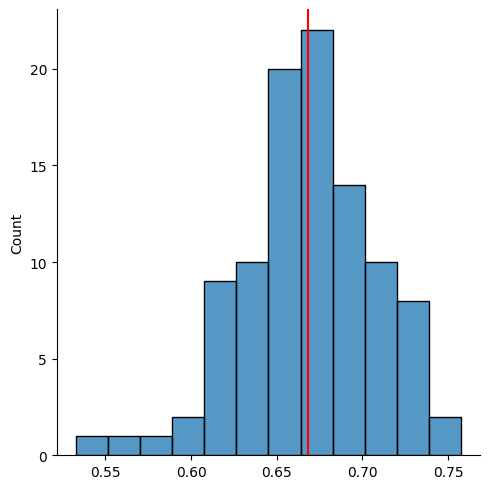

In [4]:
sample_of_100 = []

for _ in range(100):
  sample = np.random.choice(group_a, 100, replace = True) # 표본의 사이즈를 100으로 해서 백 번 중복 추출.
  sample_of_100.append(sample.mean())                     

sample_of_100_arr = np.array(sample_of_100)
print(f'표본 100개 평균의 분산 : {round(sample_of_100_arr.var(), 5)}')

sample100 = np.random.normal(loc = sample_of_100_arr.mean(),
                            scale = sample_of_100_arr.std(), size = 100)
sns.displot(sample100)
plt.axvline(group_a.mean(), color = 'red');

샘플의 사이즈를 100개로 두고 표본을 추출하여 각각 100번 평균을 구한 분포입니다.

분포를 보니 정규분포의 모양을 하고있는 것을 알 수 있습니다.

이는 중심 극한 정리 (Central Limit Theorem)으로,

__모집단의 분포와 상관없이 !__ 임의의 분포에서 추출된 표본들의 __평균분포__ 는 정규분포를 이루게 된다. 라는 이론입니다.

하지만 주의점은 __충분한 샘플 사이즈를 확보하는 것__ 입니다. (보통 n >= 30 으로 잡습니다.)

표본평균의 분산 : 0.00021965167899999982


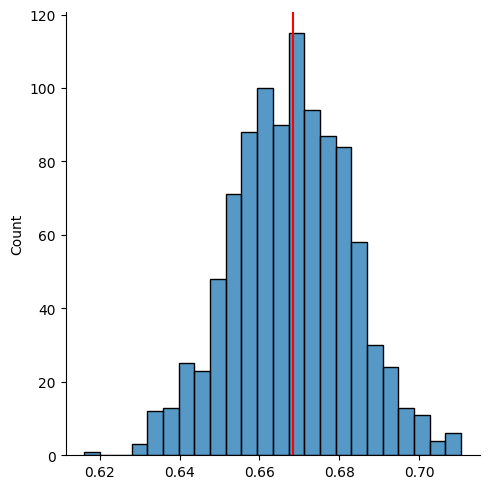

In [16]:
sample_of_1000 = []

for _ in range(10000):
  sample2 = np.random.choice(group_a, 1000, replace = True) # 표본의 사이즈를 1000으로 해서 만 번 중복 추출.
  sample_of_1000.append(sample2.mean())                     


sample_of_1000_arr = np.array(sample_of_1000)
print(f'표본평균의 분산 : {sample_of_1000_arr.var()}')
  
sample1000 = np.random.normal(loc = sample_of_1000_arr.mean(),
                            scale = sample_of_1000_arr.std(), size = 1000)
sns.displot(sample1000);
plt.axvline(group_a.mean(), color = 'red');

위의 결과를 토대로 정리를 해보면

붓스트랩의 횟수를 늘릴 수록, 샘플의 사이즈가 커질 수록 모집단의 모수와 비슷해질 가능성이 높아진다는 것을 확인할 수 있다.

위의 코드를 실행시켜보면 표본이 잘 골라진 경우 sample_of_100이 모평균을 잘 표현하는 것처럼 나올 수도 있다.

하지만 그 확률의 대소를 구한다면 sample_of_1000 > sample_of_100 이렇게 표현할 수 있다.

### 붓스트랩

사실 당연한 것이 샘플 사이즈가 작아도 엄청 많이 붓스트랩을 하게되면 모평균이랑 가까워지지 않겠나?? 라는 생각입니다.

### 큰 수의 법칙

샘플사이즈가 커지면 커질 수록 샘플의 통계치는 모집단의 모수와 가까워진다. 라는 이론입니다.

샘플사이즈가 큰 경우를 보면 이를 확인할 수 있습니다.

분산의 경우 각각 0.00246, 0.00021724 이렇게 표현되는데, 이는 표본의 갯수로 나눠서 그런 것 입니다.

따라서 모분산인 0.2216 에 근접한 수는 샘플의 갯수 1000으로 나눈 0.0002172(0.2172) 라고 할 수 있습니다.

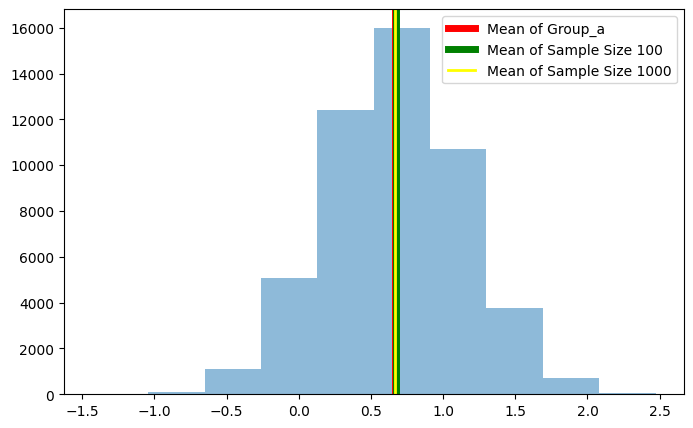

In [6]:
plt.figure(figsize=(8,5))
plt.hist(pop, alpha=0.5)
plt.axvline(group_a.mean(), c='red', lw=5, label='Mean of Group_a')
plt.axvline(sample_of_100_arr.mean(), c='green', lw=5, label = 'Mean of Sample Size 100')
plt.axvline(sample_of_1000_arr.mean(), c='yellow', lw=2, label = 'Mean of Sample Size 1000')
plt.legend();

평균도 사이즈가 1000인 것이 100인 것보다 더 가까이 있는 모습.

### 따라서.

우리는 전체를 조사하기 힘들 때 그 전체의 어느정도 부분을 떼어서 

떼어낸 부분으로 모수를 어느정도 예측할 수 있습니다. (시간과 비용적 측면에서 많이 효율적이겠죠 !)

### 신뢰구간

이번엔 문제를 더 넓혀서 생각해봅시다.

만약 대한민국 성인 남성의 평균 키를 구해봅시다.

위에서 말했던 5만명 중 0.67프로인 33500명에게 키가 어떻게 되시나요?? 하고 다니면서 키를 구한다면...

할 수 있다고 해도 시간과 비용이 아주 많이 들지 않을까요?? ( 사실 그만두고 싶겠죠.. )

저는 이러한 문제를 신뢰구간으로 해결해보려 합니다. 

일단 33500명 중에서 표본을 추출할 것 입니다.

#### 모평균의 추정

예를 들어 표본의 크기가 100이라 해볼까요?

그래서 __딱 1번만 !__ 우리는 평균을 계산해봅니다. (한 번이면 할 만하다.)

표본의 크기 = 100, 그 표본에 대한 평균x_ = 172.3

즉 100명의 성인 남성 평균 키를 딱 한 번만 조사를 해봤더니 172.3이 나왔다고 상상해봅시다.

그래서 저 딱 한 번만 구해본 평균 키 172.3을 가지고 합리적인 생각을 하게됩니다.

어떤 생각이냐면, 

" 저 평균키인 172.3 근처에 모평균이 존재할거야 ! " 입니다. 식으로 표현을 하면,

$$ \bar{x} - A \le \bar{x} \le \bar{x} + A $$

이렇게 됩니다.

즉 지금의 상황을 저 식으로 표현하면,

$$ 172.3 - A \le 172.3 \le 172.3 + A $$

이 됩니다. A의 정체는 다음과 같습니다.

$$ A = k \sigma / \sqrt{n} $$

k는 신뢰상수로써 0.95, 0.99일 때 각 1.96, 2.56 으로 계산합니다.


$$ \bar{x} + A - \bar{x} - A = 2A $$

에서 2A를 우리는 신뢰구간의 길이라고 합니다.

그래서 결론적으로.

신뢰도 95,99% 를 기준으로 모집단의 평균인 m이 2A라는 길이 사이에 있을 확률을 구할 수 있게됩니다.

이를 바탕으로 그래프를 그리고 마무리 하겠습니다.

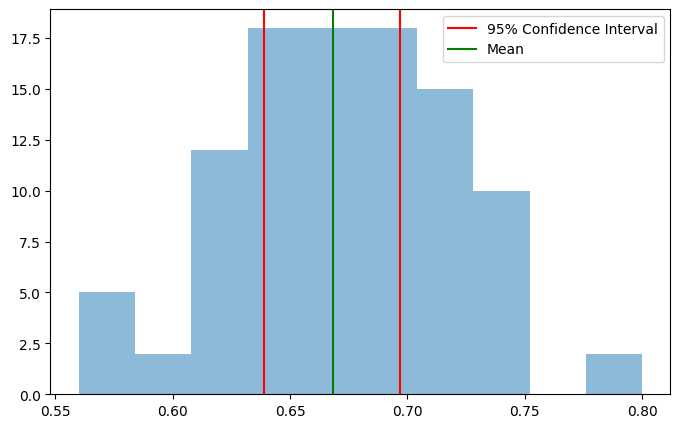

In [22]:
lower, upper = np.percentile(sample_of_1000_arr, 2.5), np.percentile(sample_of_1000_arr, 97.5) 

plt.figure(figsize=(8,5)) 
plt.hist(sample_of_100, alpha=0.5)
plt.axvline(lower, c='red', label='95% Confidence Interval')
plt.axvline(upper, c='red')
plt.axvline(sample_of_1000_arr.mean(), c='green', label='Mean')
plt.legend();

In [23]:
lower, upper

(0.639, 0.697)

따라서 우리는 95% 의 신뢰도로 0.639 <= m(비전공자의 비율) <= 0.697 이렇게 추정할 수 있습니다. 